# Propietats mecàniques. Assaig de tracció.

```{admonition} Pàgina en desenvolupament
Encara estem treballant en aquest document.   
Esperem oferir-vos properament el seu contingut.   
Disculpeu les molèsties.
```

Com respon un material a un determinat esforç? Que succeeix si l'apliquem de forma sobtada? I si l'apliquem moltíssimes vegades?

Per repondre a aquestes preguntes els enginyers fan assatjos mecànics per caracteritzar els materials.

En aquesta imatge {cite}`esforsos` podem recordar els tipuis d'esforços a ques pot estar sotmés un material:

![](img/Materials/esforsos.png)


## Assajos mecànics

És molt interessant conèixer el comportament d’un material quan li apliquem un **esforç**. Quan caracteritzem materials parlem d’esforços i no de forces perquè volem dades sobre el material, no sobre la peça en concret. Per exemple, dues peces del mateix material i diferent secció $s$ es trencaran amb forces diferents aplicades, però para un mateix valor del quocient $\large \sigma \equiv \frac{F}{s}$. Aquest quocient s’anomena esforç unitari o tensió, i la seva unitat és el Pa. Quan la tensió es perpendicular a la superfície parlem de **tensió normal**, si és paral·lela a ella parlem de **tensió tangencial**.

Pel mateix motiu ens interessaran les deformacions relatives, que depenen del material, no les absolutes, que depenen de la peça en concret. En el cas d’un esforç de tracció, per exemple, en interessarà el quocient $\large \varepsilon \equiv \frac{\Delta L}{L_0}$ , anomenat **allargament unitari**, que s’acostuma a donar en %.

Aquestes deformacions poden ser **elàstiques** (la deformació desapareix quan es deixa d’aplicar l’esforç) o **plàstiques** (la deformació es manté de forma permanent quan deixem d’aplicar l’esforç).

## Assaig de tracció

A un assaig de tracció, una proveta normalitzada amb una secció $s$ es somet a un força $F$ de tracció. La **tensió normal** o **esforç** $\sigma$ generat per la força $F$ a la secció $s$ té l'expressió: 

$$\sigma = \frac{F}{s}$$ 

Quan l'esforç en la proveta està per sota del **límit elàstic** ens trobem a la **zona elàstica** on es cumpleix la **llei de Hooke**

$$\sigma = E\varepsilon$$

on $E$ és el **mòdul de Young** o **Mòdul elàstic** i  $\varepsilon$ la deformació $\varepsilon = \frac{\Delta L}{L_{0}}$

Si l'esforç supera el *límit elàstic* ens trobarem a la **zona plàstica**, on ja no es cumpleix la llei de Hooke i la deformació és permanent. Si continuem aplicant esforç a aquesta zona arribarem a un màxim, després d'ell ens costarà menys esforç deformar el material fins arribar a la tensió de ruptura on el material es trenca. 

A aquest assaig obtenim una corba esforç/deformació. L’àrea sota aquesta corba mesura la **tenacitat** del material.

Podem fer una estimació experimental del mòdul elàstic amb $\Large \frac{\Delta \sigma}{\Delta \varepsilon}$

<a title="CC BY-SA 3.0 via wikimedia" href="https://commons.wikimedia.org/w/index.php?curid=647577" target="_blank"><img src="https://upload.wikimedia.org/wikipedia/commons/0/0c/Stress_v_strain_Aluminum_2.png"></a>

Després de la zona elàstica apareix la zona plàstica, amb un valor màxim de l’esforç (1) que s’anomena **resistència a la tracció** ($R_m$).

Si continuem aplicant esforç la mostra arriba al punt de fractura (4). L’allargament corresponent (caldrà restar la part elàstica amb una paral·lela a
la línia elàstica) ens dona una mesura de la ductilitat del material.

Com experimentalment potser difícil determinar el limit elàstic (3), per conveni {cite}`Introducción_a_la_Ciencia_de_Materiales_para_ingenieros` s’agafa com a límit elàstic experimental (2) el punt de tall de la corba amb una paral·lela a la línia elàstica amb una deformació del 0,2 % (5).

Típicament els valors de $\sigma$ són de l’ordre del MPa (N/mm²) mentre que les valor del mòdul de Young acostumen a ser de l’ordre del GPa.

Els diagrames de tracció dels materials fràgils i dúctils són molt diferents, com podeu observar a la figura.

<a title="Nicoguaro, CC BY 4.0 &lt;https://creativecommons.org/licenses/by/4.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Stress_strain_comparison_brittle_ductile.svg"><img width="400" alt="Stress strain comparison brittle ductile" src="https://upload.wikimedia.org/wikipedia/commons/0/0f/Stress_strain_comparison_brittle_ductile.svg"></a>

En els materials fràgils la zona plàstica és en la pràctica inexistent. No podrem aconseguir un allargament permanent sense trencar-los.

En canvi els materials dúctils presenten una amplia zona plàstica que ens permet deformar-los sense que es trenquin, augmentant sensiblement el seu allargament permanent.

En aquest vídeo podem veure el procediment experimental:

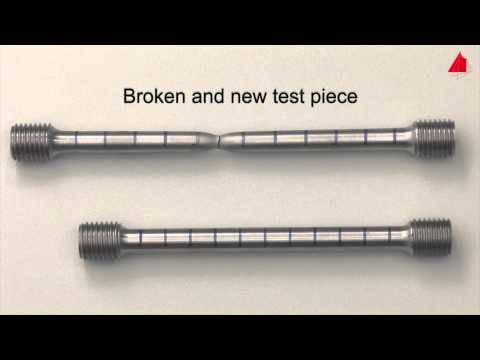

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('D8U4G5kcpcM')

### Exemple d'anàlisi d'u diagrama de tracció

Anem a estudiar un assaig amb un acer 4142 (trobareu diverses dades experimentals a https://github.com/ProfessorKazarinoff/staticsite/tree/master/content/code/matplotlib_plots i a https://pythonforundergradengineers.com/stress-strain-curve-with-python-and-matpotlib.html) 

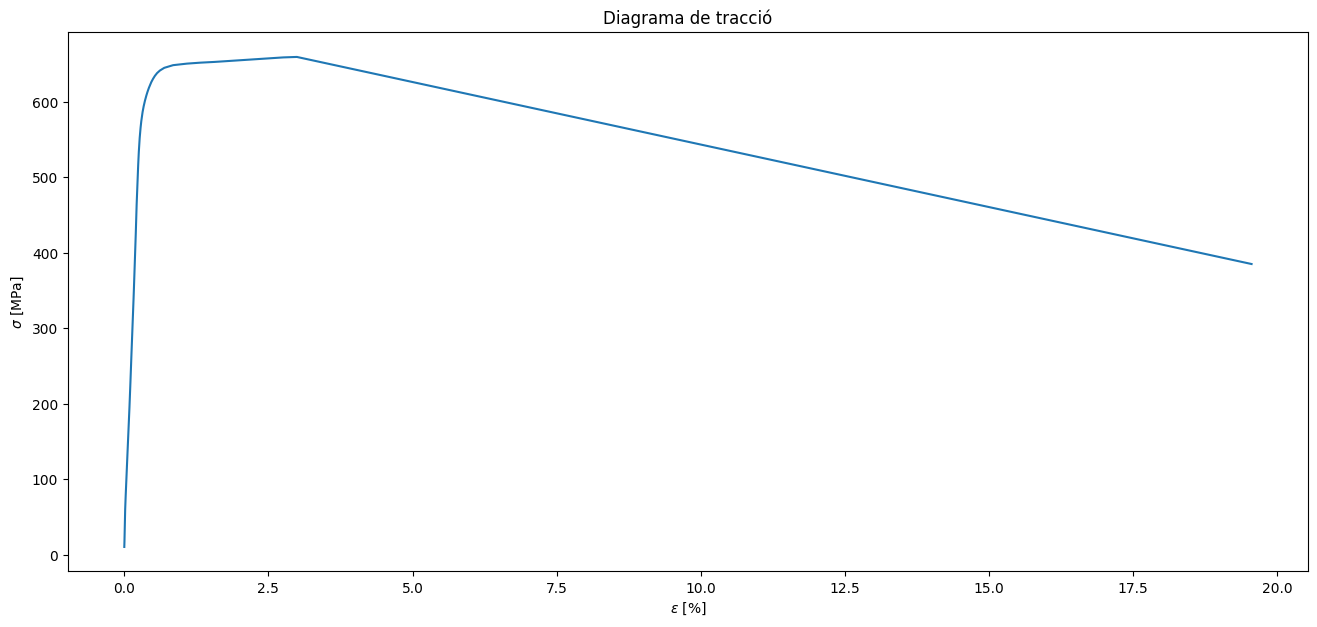

In [2]:
import numpy as np                        
import pandas as pd                       
import matplotlib.pyplot as plt           
import matplotlib.gridspec as gridspec    
import statistics as st                   
from scipy.stats import linregress        
from IPython.display import Markdown      


with open('data/Materials/acero_4142.npy', 'rb') as f:
    e = np.load(f)
    s = np.load(f)

e = e * 100    # treballarem amb la deformació en %

%matplotlib inline                               
plt.rcParams['figure.figsize'] = (16,7)           # determines the dimensions (size of the figure)
fig = plt.figure()
plt.plot(e, s)
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Diagrama de tracció");

Si ens fixem en la zona elàstica, podrem fer una estimació del mòdul elàstic, agafant els punts que estan en línia recta

In [3]:
ms = linregress(e[35:102], s[35:102])
Es = ms[0]  
offset_acer = Es*(e - 0.2)
print("El Mòdul elàstic de l'acer 4142 és %d MPa" % Es )

El Mòdul elàstic de l'acer 4142 és 2022 MPa


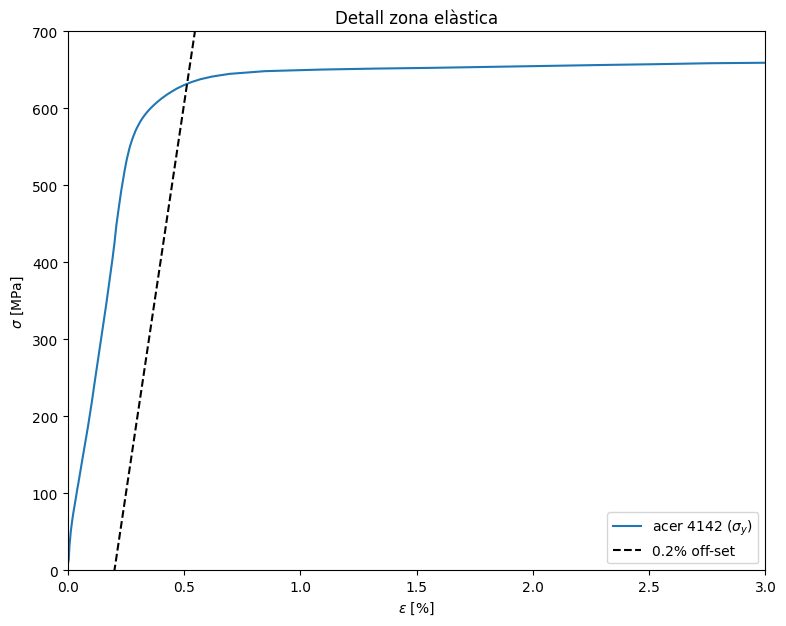

In [4]:
%matplotlib inline                                       
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Detall zona elàstica")
plt.axis([0,3,0,700])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');


Podeu observar que hem dibuixat una líne paral·lela a la del comportament elàstic desplaçada un 0,2 % a la dreta. Com és molt difícil saber on acaba la recta i comenza la zona no linial, s'agafa com a valor experimental del límit elàstc el punt de tall de la corba amb aquesta recta desplaçada.

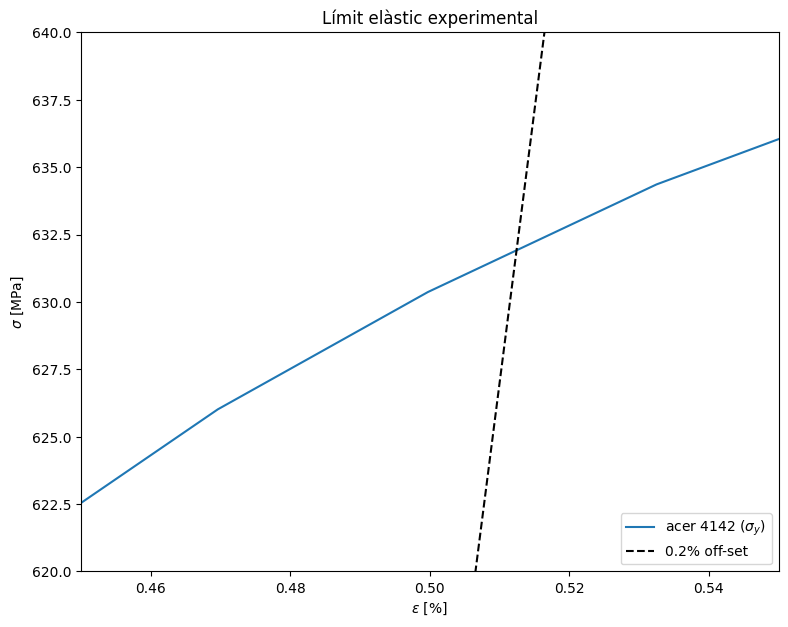

In [5]:
%matplotlib inline                             
plt.rcParams['figure.figsize'] = (9,7)     
plt.plot(e, s)
plt.plot(e, offset_acer,'k--')
plt.xlabel('$\epsilon$ [%]')
plt.ylabel('$\sigma$ [MPa]')
plt.title("Límit elàstic experimental")
plt.axis([0.45,0.55,620,640])
plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');
#plt.savefig('acer_limit_elastic.png') 

podem veure que el punt de tall es troba al voltant dels  630 MPa

Amb aquest gràfic interactiu podem precisar més fàcilment el punt de tall

In [6]:
#import plotly.offline as pyo
#pyo.init_notebook_mode(connected=True)

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio


#pio.renderers.default = 'notebook'
#pio.renderers.default = 'jupyterlab'

#fig = px.scatter(x=e, y=s)
#fig = px.line(x=e, y=s, labels={'x':'$\epsilon [%]$', 'y':'$\sigma$$ [MPa]$'})
fig = go.Figure()
fig.add_trace(go.Scatter(x=e,y=s, mode='lines', name='real'))
fig.add_trace(go.Scatter(x=e,y=offset_acer, mode='lines', name='recta'))
fig.update_layout(
    xaxis_title=r'deformació [%]',
    yaxis_title=r'tensió [MPa]'
)
fig.update_xaxes(range=[0.51238, 0.51248])
fig.update_yaxes(range=[631.7, 632])
#fig.show("notebook") 
#fig.show("jupyterlab")
#fig.show(renderer="plotly_mimetype")
fig.write_html("assets/w3/diagtrac.html")

In [7]:
%%html
 <iframe src="w3/diagtrac.html" width=600 height="500"></iframe> 

In [8]:
s_exp = 631.9
s_max = max(s)
print("L'acer 4142 té un límit elàstic de %.1f MPa i i una tensió màxima de %.1f MPa" %(s_exp, s_max))   

L'acer 4142 té un límit elàstic de 631.9 MPa i i una tensió màxima de 659.3 MPa


Una vegada que la proveta s'ha trencat a la tensió de ruptura, recupera la deormació elàstica. Per estimar la deformació plàstica que ens dona la ductibilitat del material caldrà restar la deformació elàstica amb una paral·lela a la recta elàstica. Podem fer una estimació amb aquest gràfic

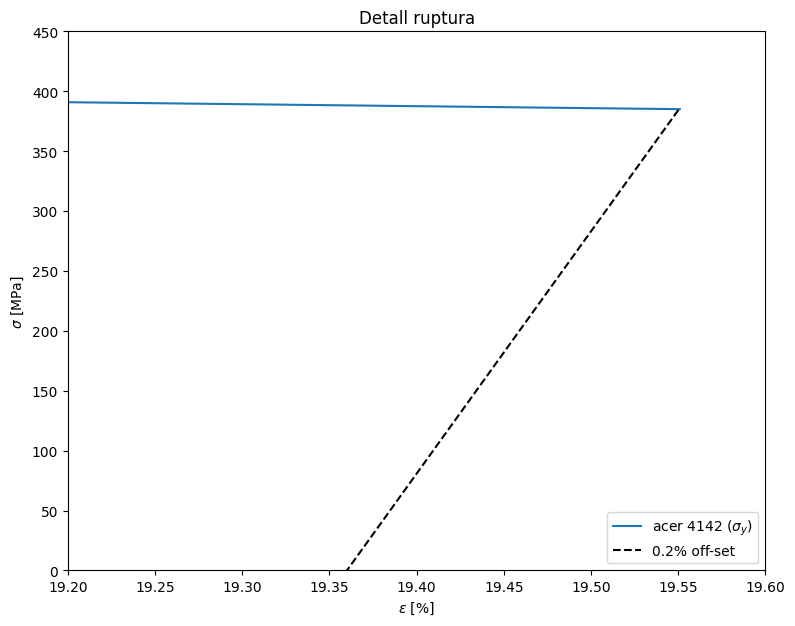

In [9]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt
import numpy as np

def f(b):
    offset_acer2 = Es*(e - b)    
    plt.figure()
    plt.plot(e, s)
    plt.plot(e, offset_acer2,'k--')
    plt.xlabel('$\epsilon$ [%]')
    plt.ylabel('$\sigma$ [MPa]')
    plt.title("Detall ruptura")
    plt.axis([19.2,19.6,0,450])
    plt.legend(["acer 4142 ($\sigma_{y}$)","0.2% off-set"],loc='lower right');    
    plt.show()

#interactive_plot = interactive(f, b=(19.2,19.6, 0.02))
#output = interactive_plot.children[-1]
#interactive_plot
f(19.36)

Podeu comprobar fàcilment que la deformació plàstica és d'un 19,36 %